In [1]:
# common imports
import numpy as np
import os
import sklearn
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import lightgbm as lgb
import xgboost


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.feature_selection import SelectKBest

from sklearn.pipeline import Pipeline


# to make this notebook's output stable across runs
np.random.seed(4)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:

X= train.drop(['Cover_Type', 'Id'], axis=1) 
y= train['Cover_Type']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [6]:
# initialize the classificators
rfc= RandomForestClassifier(random_state=77)
gbc= GradientBoostingClassifier(random_state=77)
ada = AdaBoostClassifier(random_state=77)
etc = ExtraTreesClassifier(random_state=77)
lgbm = lgb.LGBMClassifier(random_state=77)

# now, create a list with the objects 
models= [rfc, gbc, ada, etc, lgbm]

In [5]:
for model in models:
    model.fit(X_train, y_train) 
    train_score= model.score(X_train, y_train) 
    test_score= model.score(X_test, y_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.85


The score in train of model GradientBoostingClassifier is 0.84
The score in test of model GradientBoostingClassifier is 0.78


The score in train of model AdaBoostClassifier is 0.43
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.85


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.85




- Scores with train RAW:

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.85


The score in train of model GradientBoostingClassifier is 0.84
The score in test of model GradientBoostingClassifier is 0.78


The score in train of model AdaBoostClassifier is 0.43
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.85


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.85

In [8]:
train1 = pd.read_csv('train_CONT.csv')

In [9]:
X= train1.drop(['Cover_Type', 'Id'], axis=1) 
y= train1['Cover_Type']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [10]:
for model in models:
    model.fit(X_train, y_train) 
    train_score= model.score(X_train, y_train) 
    test_score= model.score(X_test, y_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.87


The score in train of model GradientBoostingClassifier is 0.86
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.36
The score in test of model AdaBoostClassifier is 0.33


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.88


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.86




- train_CONT

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.87


The score in train of model GradientBoostingClassifier is 0.86
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.36
The score in test of model AdaBoostClassifier is 0.33


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.88


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.86

In [2]:
train2 = pd.read_csv('train_CONT_5.csv')

In [4]:
X= train2.drop(['Cover_Type', 'Id'], axis=1) 
y= train2['Cover_Type']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [7]:
for model in models:
    model.fit(X_train, y_train) 
    train_score= model.score(X_train, y_train) 
    test_score= model.score(X_test, y_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.85


The score in train of model GradientBoostingClassifier is 0.86
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.36
The score in test of model AdaBoostClassifier is 0.33


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.86




CONT_4

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.85


The score in train of model GradientBoostingClassifier is 0.85
The score in test of model GradientBoostingClassifier is 0.79


The score in train of model AdaBoostClassifier is 0.43
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.85

## 1. RandomForestClassifier

In [2]:
train2 = pd.read_csv('../data/train_CONT.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/train_CONT.csv'

In [8]:
X = train2.drop(['Cover_Type', 'Id'], axis= 1)
y = train2['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12096, 18)
(3024, 18)
(12096,)
(3024,)


In [9]:
rf = RandomForestClassifier(random_state=44)

rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)

In [10]:
print (rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.8597883597883598


In [11]:
print(accuracy_score(y_test, y_test_pred_rf))
print(precision_score(y_test, y_test_pred_rf, average='macro'))
print(recall_score(y_test, y_test_pred_rf, average='macro'))
print(f1_score(y_test, y_test_pred_rf, average='macro'))

0.8597883597883598
0.8565835427221452
0.8593237825548786
0.8569989642789642


1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

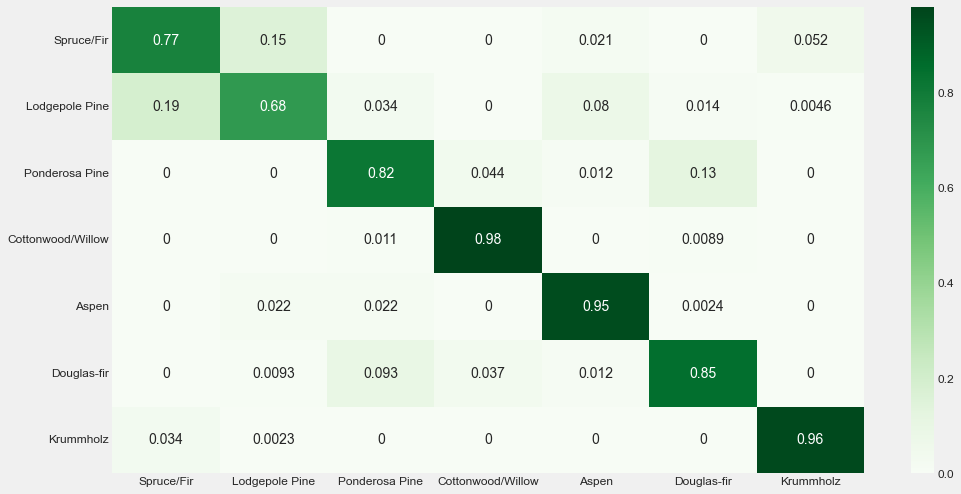

In [12]:
x_axis_labels = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'] 
y_axis_labels = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'] 

plt.figure(figsize = (15,8))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf, normalize='true'), annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Greens');

- Saving the model:

In [38]:
import pickle
from datetime import datetime

filename = 'RFC_model'

date = str(datetime.today().strftime('%y%m%d%H%M%S'))

name = filename + date

# path = ruta relativa

with open(name, 'wb') as archivo_salida:
    pickle.dump(rf, archivo_salida)

## ETC

In [13]:
etc = ExtraTreesClassifier(random_state=44)

etc.fit(X_train, y_train)

y_test_pred_etc = etc.predict(X_test)

In [14]:
print (etc.score(X_train, y_train))
print(etc.score(X_test, y_test))

1.0
0.8736772486772487


In [15]:
print(accuracy_score(y_test, y_test_pred_etc))
print(precision_score(y_test, y_test_pred_etc, average='macro'))
print(recall_score(y_test, y_test_pred_etc, average='macro'))
print(f1_score(y_test, y_test_pred_etc, average='macro'))

0.8736772486772487
0.8709819863422543
0.8732152420499888
0.8711810169362029


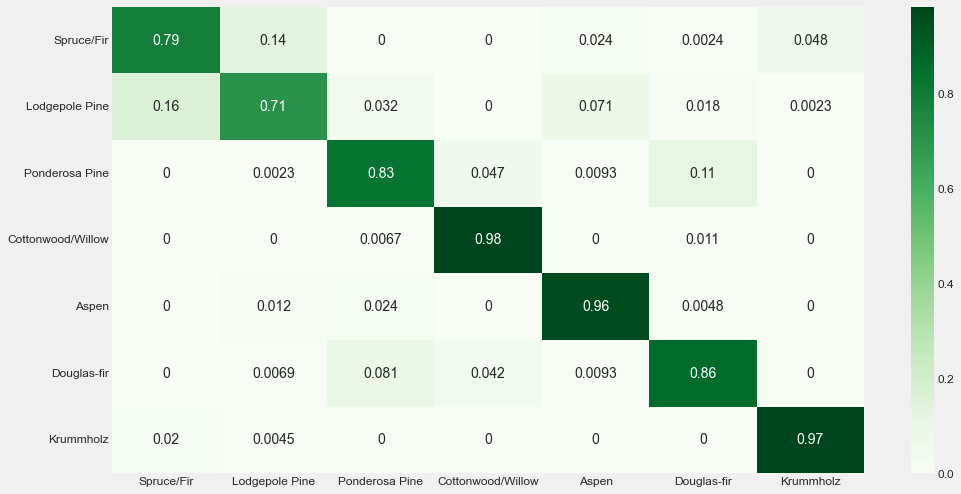

In [16]:
x_axis_labels = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'] 
y_axis_labels = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'] 

plt.figure(figsize = (15,8))
sns.heatmap(confusion_matrix(y_test, y_test_pred_etc, normalize='true'), annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Greens');

## New direction:

Los modelos tenen el mismo problema: no predicen bien los targets 'Spruce/Fir' y 'Lodgepole Pine'.

Vamos a hacer dos modelos diferentes

In [17]:
train_1 = train2[(train2['Cover_Type'].isin([1,2]))]
train_2 = train2[(train2['Cover_Type'].isin([3,4,5,6,7]))]

In [18]:
train_1['Cover_Type'].unique()


array([2, 1], dtype=int64)

In [19]:

train_2['Cover_Type'].unique()

array([5, 7, 3, 6, 4], dtype=int64)

- First model selection: 

In [20]:
# initialize the classificators
rfc= RandomForestClassifier(random_state=77)
etc = ExtraTreesClassifier(random_state=77)
lgbm = lgb.LGBMClassifier(objective= 'binary',random_state=77)

# now, create a list with the objects 
models= [rfc, etc, lgbm]

In [21]:
X_1= train_1.drop(['Cover_Type', 'Id'], axis=1) 
y_1= train_1['Cover_Type']
X_1_train, X_1_test, y_1_train, y_1_test= train_test_split(X_1,y_1, test_size= 0.2)

In [22]:
for model in models:
    model.fit(X_1_train, y_1_train) 
    train_score= model.score(X_1_train, y_1_train) 
    test_score= model.score(X_1_test, y_1_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.82


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.83


The score in train of model LGBMClassifier is 0.97
The score in test of model LGBMClassifier is 0.82




Confusion matrix for the LGBC:

In [23]:
y_1_test_pred_lgbm = lgbm.predict(X_1_test)

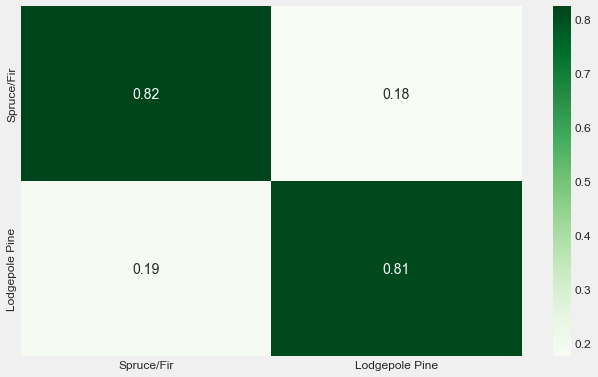

In [24]:
x_axis_labels = ['Spruce/Fir','Lodgepole Pine'] 
y_axis_labels = ['Spruce/Fir','Lodgepole Pine'] 

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_1_test, y_1_test_pred_lgbm, normalize='true'), annot=True, xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels, cmap='Greens');

- 2nd model selection: 

In [25]:
# initialize the classificators
rfc_2= RandomForestClassifier(random_state=77)
etc_2 = ExtraTreesClassifier(random_state=77)
lgbm_2 = lgb.LGBMClassifier(random_state=77)

# now, create a list with the objects 
models= [rfc_2, etc_2, lgbm_2]

In [26]:
X_2= train_2.drop(['Cover_Type', 'Id'], axis=1) 
y_2= train_2['Cover_Type']
X_2_train, X_2_test, y_2_train, y_2_test= train_test_split(X_2,y_2, test_size= 0.2)

In [27]:
for model in models:
    model.fit(X_2_train, y_2_train) 
    train_score= model.score(X_2_train, y_2_train) 
    test_score= model.score(X_2_test, y_2_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.93


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.93


The score in train of model LGBMClassifier is 1.00
The score in test of model LGBMClassifier is 0.93




In [28]:
y_2_test_pred_etc_2 = etc_2.predict(X_2_test)

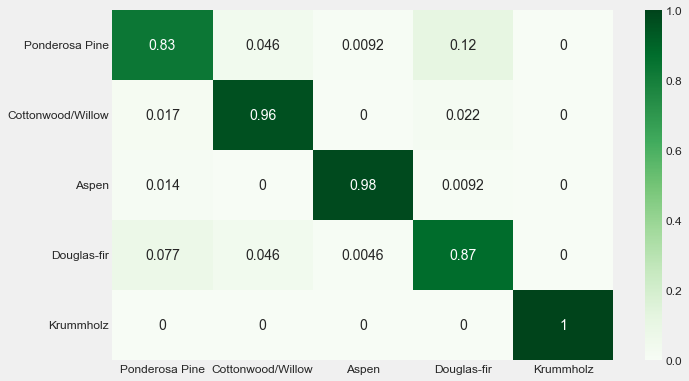

In [29]:
x_axis_labels = ['Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'] 
y_axis_labels = ['Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'] 

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_2_test, y_2_test_pred_etc_2, normalize='true'), annot=True, 
                            xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Greens');

## otra idea: 

no agrupamos, como antes, las categorías que más se confunden entre sí; ahora, separamos los valores del target que epresentan zonas de vegetación en el primer modelo, y los valores de traget que se refieren a especies de árboles por otro.

In [30]:
train__1 = train2[(train2['Cover_Type'].isin([1,7]))]
train__2 = train2[(train2['Cover_Type'].isin([2,3,4,5,6]))]

## modelo 1

In [31]:
# initialize the classificators
rfc= RandomForestClassifier(random_state=77)
etc = ExtraTreesClassifier(random_state=77)
lgbm = lgb.LGBMClassifier(objective= 'binary',random_state=77)

# now, create a list with the objects 
models= [rfc, etc, lgbm]

In [32]:
X_1= train__1.drop(['Cover_Type', 'Id'], axis=1) 
y_1= train__1['Cover_Type']
X_1_train, X_1_test, y_1_train, y_1_test= train_test_split(X_1,y_1, test_size= 0.2)

In [33]:
for model in models:
    model.fit(X_1_train, y_1_train) 
    train_score= model.score(X_1_train, y_1_train) 
    test_score= model.score(X_1_test, y_1_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.97


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.98


The score in train of model LGBMClassifier is 1.00
The score in test of model LGBMClassifier is 0.98




In [34]:
y_1_test_pred_etc = etc.predict(X_1_test)

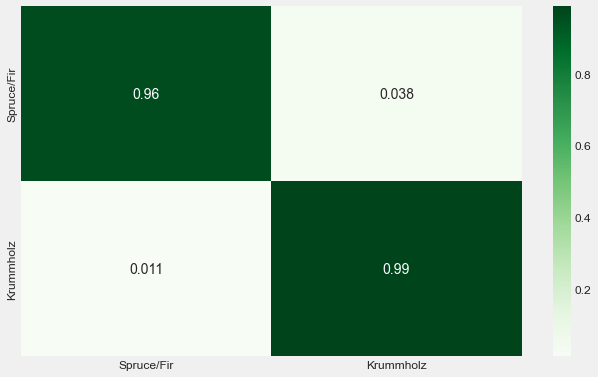

In [35]:
x_axis_labels = ['Spruce/Fir','Krummholz'] 
y_axis_labels = ['Spruce/Fir','Krummholz'] 

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_1_test, y_1_test_pred_etc, normalize='true'), annot=True, xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels, cmap='Greens');

In [ ]:
import pickle
from datetime import datetime

filename = '0_ETC_1_DEF_'

date = str(datetime.today().strftime('%y%m%d%H%M%S'))

name = filename + date

# path = ruta relativa

with open(name, 'wb') as archivo_salida:
    pickle.dump(etc, archivo_salida)

In [38]:
importances = pd.DataFrame(data={
    'Attribute': X_1.columns,
    'Importance': etc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

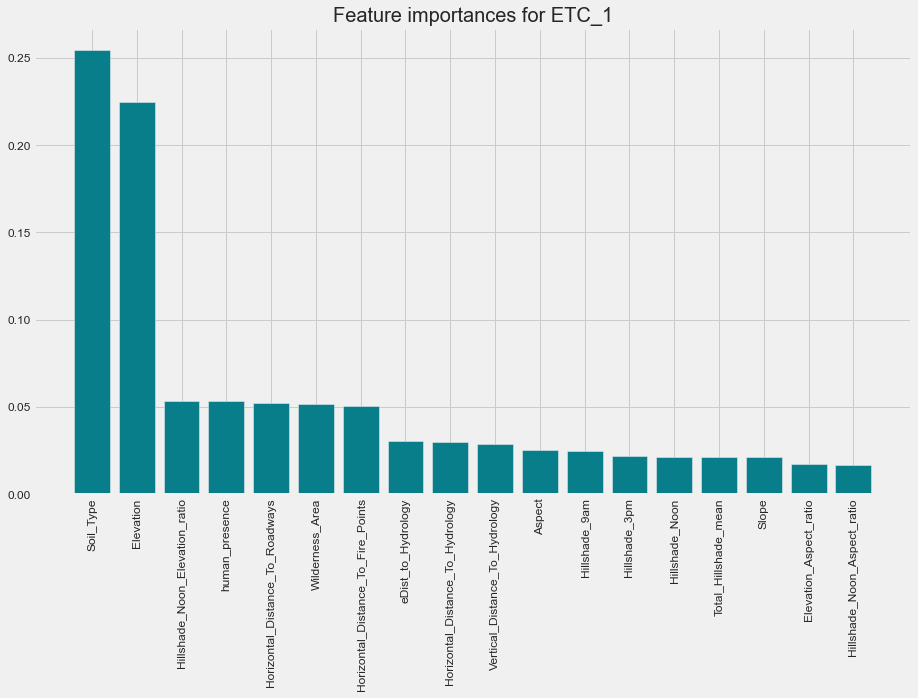

In [40]:
plt.figure(figsize = (14,8))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_1', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# initialize the classificators
rfc_2= RandomForestClassifier(random_state=77)
etc_2 = ExtraTreesClassifier(random_state=77)
lgbm_2 = lgb.LGBMClassifier(random_state=77)

# now, create a list with the objects 
models= [rfc_2, etc_2, lgbm_2]

In [42]:
X_2= train__2.drop(['Cover_Type', 'Id'], axis=1) 
y_2= train__2['Cover_Type']
X_2_train, X_2_test, y_2_train, y_2_test= train_test_split(X_2,y_2, test_size= 0.2)

In [43]:
for model in models:
    model.fit(X_2_train, y_2_train) 
    train_score= model.score(X_2_train, y_2_train) 
    test_score= model.score(X_2_test, y_2_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.89


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.90


The score in train of model LGBMClassifier is 1.00
The score in test of model LGBMClassifier is 0.89




In [44]:
y_1_test_pred_etc_2 = etc_2.predict(X_2_test)

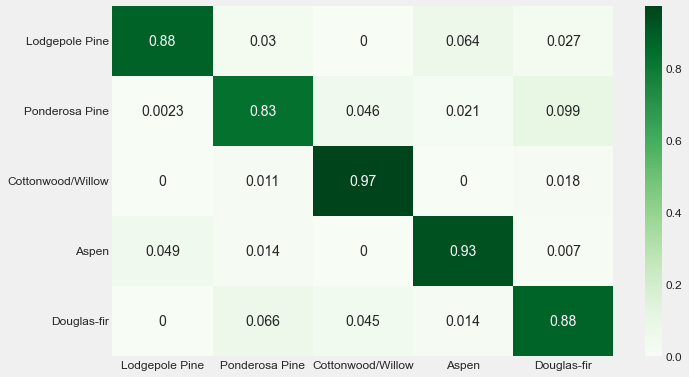

In [45]:
x_axis_labels = ['Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir'] 
y_axis_labels = ['Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir'] 

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_2_test, y_1_test_pred_etc_2, normalize='true'), annot=True, 
                            xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Greens');

In [46]:
importances = pd.DataFrame(data={
    'Attribute': X_1.columns,
    'Importance': etc_2.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

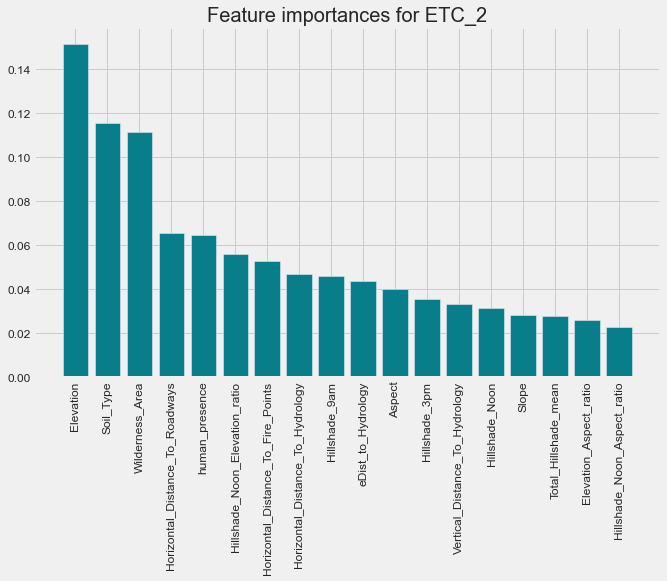

In [47]:
plt.figure(figsize = (10,6))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_2', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
import pickle
from datetime import datetime

filename = '0_ETC_2_DEF_5'

date = str(datetime.today().strftime('%y%m%d%H%M%S'))

name = filename + date

# path = ruta relativa

with open(name, 'wb') as archivo_salida:
    pickle.dump(etc_2, archivo_salida)

In [ ]:
svm = Pipeline([
                ("selectkbest",SelectKBest()),
                ("classificator",RandomForestClassifier()),
                ('')
               ])


reg_log = Pipeline([("imputer",SimpleImputer()),
                    ("scaler",StandardScaler()),
                    ("reglog",LogisticRegression()),

                   ])

'''
Para iterar hiperparámetros de varios elementos del pipeline, le ponemos un nombre
a cada elemento en el pipeline, por ejemplo 'selectkbest' y 'svm', para luego en el
grid de hiperparametros identificar sus respectivos parametros mediante el nombre
que le hayamos puesto en el pipeline, dos guines bajos y el nombre del hiperparámetro.
'''

grid_random_forest = {"n_estimators": [120],
                     "max_depth": [3,4,5,6,10,15,17],
                     "max_features": ["sqrt", 3, 4]                          
                     }


svm_param = {                    
            'selectkbest__k': [1,2,3],
            'svm__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
            'svm__kernel': ["linear","poly","rbf"],
            'svm__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
            'svm__gamma': ('scale', 'auto')
            }


reg_log_param = {    
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
                 "reglog__penalty": ["l1","l2"], 
                 "reglog__C": np.logspace(0, 4, 10)
                }

CONT_3.3

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.86


The score in train of model GradientBoostingClassifier is 0.85
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.43
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.86

CONT_3

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.86


The score in train of model GradientBoostingClassifier is 0.85
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.41
The score in test of model AdaBoostClassifier is 0.39


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.86

CONT_4

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.87


The score in train of model GradientBoostingClassifier is 0.85
The score in test of model GradientBoostingClassifier is 0.81


The score in train of model AdaBoostClassifier is 0.45
The score in test of model AdaBoostClassifier is 0.45


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.88


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.87

CONT_22

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.86


The score in train of model GradientBoostingClassifier is 0.86
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.37
The score in test of model AdaBoostClassifier is 0.35


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.85

with 2

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.85


The score in train of model GradientBoostingClassifier is 0.86
The score in test of model GradientBoostingClassifier is 0.80


The score in train of model AdaBoostClassifier is 0.40
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.86

In [11]:
from sklearn.feature_selection import SelectKBest

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': X.columns, 'score': sel.scores_}).sort_values('score', ascending=False)

(15120, 15)
(15120, 5)
[16241.23331729    48.29737499   301.8490513    375.89722795
    74.73613318  1223.07045796   378.22075113   117.9831956
   197.80245884   746.12457609   349.33331518  1469.96262822
  2889.95797551  6539.10510598  3253.72710273]


,column,score
0,Elevation,16241.233317
13,Soil_Type,6539.105106
14,Hillshade_Noon_Elevation_ratio,3253.727103
12,Wilderness_Area,2889.957976
11,human_presence,1469.962628
5,Horizontal_Distance_To_Roadways,1223.070458
9,Horizontal_Distance_To_Fire_Points,746.124576
6,Hillshade_9am,378.220751
3,Horizontal_Distance_To_Hydrology,375.897228
10,eDist_to_Hydrology,349.333315


In [23]:
import phik